In [1]:
import sqlite3 as sql
import pandas as pd
import sys
from openpyxl import load_workbook

In [2]:
!rm system_migovec.sql
!rm system_migovec.db
!rm lengths_by_year.xlsx

In [3]:
therion_config = """
source ../../system_migovec.th

export database -o system_migovec.sql"""

with open('db.thconfig','w+') as f:
    f.write(therion_config)
    f.close()

In [4]:
!therion db.thconfig

therion 5.4.1+? (compiled on 2018-06-25)
cavern - Survex 1.2.36
initialization file: /usr/local/etc/therion.ini
reading ... done
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=pdfetex)
 restricted \write18 enabled.
entering extended mode
(./fonttest.tex
checking optional fonts csr10 csti10 csbx10 csss10 csssi10 ... OK
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=pdfetex)
 restricted \write18 enabled.
entering extended mode
(./fonttest.tex
checking optional fonts cmcyr10 cmcti10 cmcbx10 cmcss10 cmcssi10 ... OK
configuration file: db.thconfig
reading ... done
reading source files ... done
preprocessing database ... done
scanning centreline tree ... done
searching for centerline loops ... done
calculating station coordinates ... done
average loop error: 3.23%
processing survey data ... done
calculating basic statistics ... done
processing extended elevation ... done
processing references ... done
selecting export object

In [5]:
!sqlite3 system_migovec.db < system_migovec.sql

In [6]:
conn = sql.connect("system_migovec.db")

In [7]:
length_query = """
SELECT c.TOPO_DATE,s.NAME,c.LENGTH,c.DUPLICATE_LENGTH,s.FULL_NAME,c.SURVEY_ID
FROM CENTRELINE as c,SURVEY as s 
WHERE (s.ID = c.SURVEY_ID AND NOT c.TOPO_DATE = 'None' )
ORDER BY c.TOPO_DATE;"""

In [8]:
dat = pd.read_sql_query(length_query,conn)

In [9]:
path = 'lengths_by_year.xlsx'

In [10]:
dat.to_excel(path)

In [11]:
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

In [29]:
for i in range(1995,2020):
    print(i)

    len_query = """
    SELECT c.TOPO_DATE,s.NAME,c.LENGTH,c.DUPLICATE_LENGTH
    FROM CENTRELINE as c,SURVEY as s 
    WHERE (s.ID = c.SURVEY_ID AND  c.TOPO_DATE like '{}%' )
    ORDER BY c.TOPO_DATE;""".format(i)
    
    dat = pd.read_sql_query(len_query,conn)
    dat.to_excel(writer,sheet_name='{}'.format(i))
    writer.save()
writer.close()

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [30]:
import matplotlib.pyplot as plt

In [31]:
dat = pd.read_sql_query(length_query,conn)

In [34]:
dat["cumul_length"] = dat.LENGTH.cumsum()

/Users/AchilleTalon/miniconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


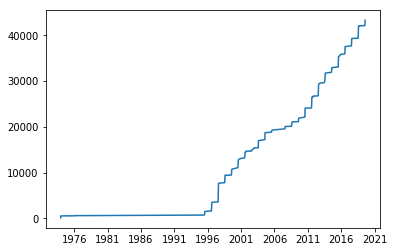

In [35]:
fig,ax = plt.subplots()

ax.plot(pd.to_datetime(dat.TOPO_DATE),dat["cumul_length"])

plt.show()

In [40]:
query = """
SELECT P.NAME,p.SURNAME,s.NAME,c.TOPO_DATE FROM CENTRELINE as c,PERSON as p, SURVEY as s,TOPO as t
WHERE (t.PERSON_ID = p.ID AND t.CENTRELINE_ID = c.ID AND s.ID = c.SURVEY_ID AND p.NAME = 'Tanguy')
ORDER BY c.TOPO_DATE;"""

pd.read_sql(query,conn)

,NAME,SURNAME,NAME,TOPO_DATE
0,Tanguy,Racine,sicsempertyrannis,2014-07-19
1,Tanguy,Racine,jericho2,2014-07-26
2,Tanguy,Racine,serrure,2014-07-30
3,Tanguy,Racine,apuntoofar1,2014-08-06
4,Tanguy,Racine,apuntoofar2,2014-08-07
5,Tanguy,Racine,apuntoofar3,2014-08-08
6,Tanguy,Racine,firstdraft,2015-07-25
7,Tanguy,Racine,finaldraft,2015-07-25
8,Tanguy,Racine,meridianway,2015-07-25
9,Tanguy,Racine,pushyourluck,2015-07-26
